# Lab 5 Data Visualizations

In [1]:
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns  #IMPORTANT - UPGRADE SEABORN TO VERSION 0.9.0 IN ANACONDA ENV
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# makes the graphs visible in this notebook
%matplotlib inline  

In [3]:
# apply the default seaborn theme, scaling, and color palette
sns.set()

## Abstract

In this lab I will be analyzing a dataset from the Seaborn Data collection. This dataset was built into seaborn and thus I would predict it would be accessible for at least the next 10 years. This dataset named "iris" is a csv file  and has what looks to primarily be numerical data on different species of irises.

Questions:
1. What are the features of our data?
2. How many observations does our data have?
3. Are there any relationships between our features?
4. What are the types of the data?
5. What is the min and max of the statistical data?
6. What is the mean and median of the statistical data?
7. What types of data are there?

## Dataset Exploration

Loading in the "iris" dataset from Seaborn. 

In [4]:
iris = sns.load_dataset("iris")

Finding out what types of data are in the dataset and determining if there is any missing data.

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


From this we know that the dataset is primarily numerical data in the form of floats, and there is one object to represent the species of iris. There are 150 observations. We also learn that there are 5 features named: sepal_length, sepal_width, petal_length, petal_width, and species.

Next we want to look at the format of our dataset.

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


From this we know that our dataset is very clean and has a species name accompanied by 4 pieces of data per species and an index. 

Our next task is to create a data visualization to look at the data as a whole, we choose a scatterplot of sepal_length and sepal_width.

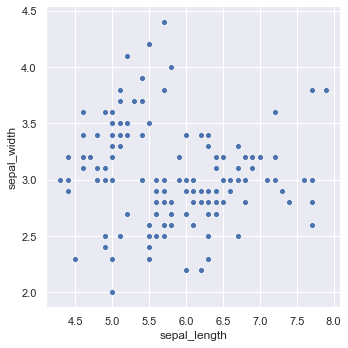

In [7]:
sns.relplot(x="sepal_length", y="sepal_width", data=iris, kind="scatter")

From this data we learn that without separating species, it will be difficult to have a trend line or differentiate causation from correlation. 

But, what if we look at a scatterplot of petal_length and petal_width?

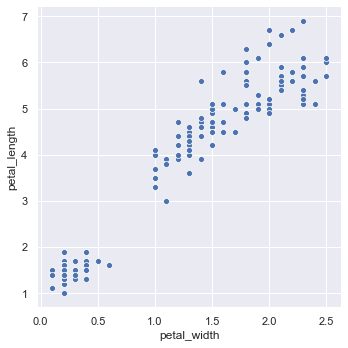

In [8]:
sns.relplot(x="petal_width", y="petal_length", data=iris, kind="scatter")

While we can now create a trend line fairly easily, we still do not know how to fully interpret this without separating the species.

Given we notice the data may be affected by the species type, we want to find out what species there are.

In [9]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

We have found that there are 3 species of iris: setosa, versicolor, and virginica. 

Ultimately, we have learned that our data is primarily numerical but separated by categories that may have an effect on the numerical data for each of our features. We have learned that there are 5 features, 150 observations, and 3 different species. 

## Data Modeling and Analysis

First, lets find out basic statistical information about our dataset. 

In [10]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From this we have learned that our statistical data is fairly close together with the widths being less than the lengths and petal dimensions being less than sepal dimensions. 

However these calculations combine all three species into one dataset, do we see more of a trend if we separate the species? lets look. 

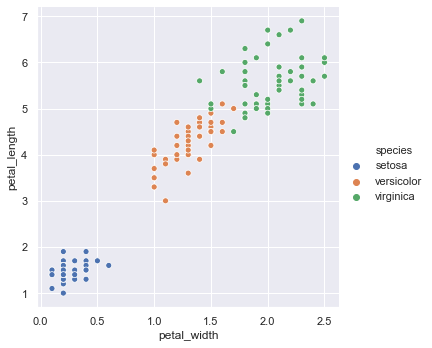

In [11]:
sns.relplot(x="petal_width", y="petal_length", hue = "species", data=iris, kind="scatter")

From this we can see a few things:
1. There is a strong correlation existant here, where the greater the width of the petal,  the greater the length of the petal. 
2. We can see that Setosa irises are the smallest irises and virginica irises are the largest. 

To even more clearly show this, lets look at a box and whisker plot.

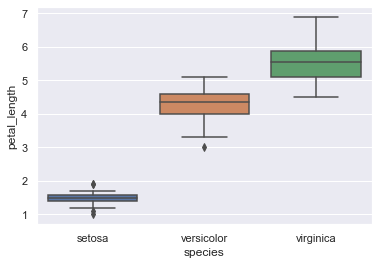

In [12]:
sns.boxplot(x="species", y="petal_length", data=iris)

From this visualization we can clearly see virginica having the longest petals and the setosa species having the shortest petals.

We then want to see what species has the widest petals and which species of iris has the narrowest petals. 

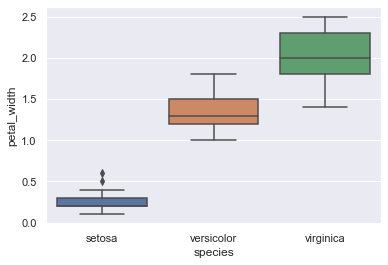

In [13]:
sns.boxplot(x="species", y="petal_width", data=iris)

From this we can tell that the virginica species of iris has the widest petals and the sertosa species has the narrowest petals.

Do we get a similar result with Sepal dimensions?

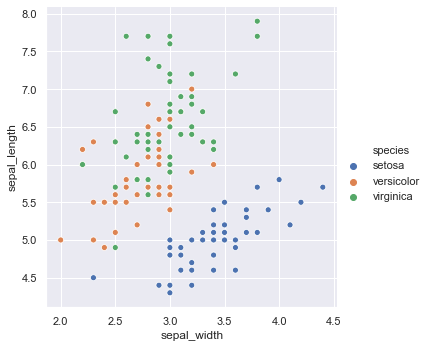

In [14]:
sns.relplot(x="sepal_width", y="sepal_length", hue = "species", data=iris, kind="scatter")

From this visualization we can see a strong correlation between sepal width and sepal length for setosa irises, but this correlation for versicolor and virginica irises is less pronounced.

It becomes a little clearer with a box and whisker plot.

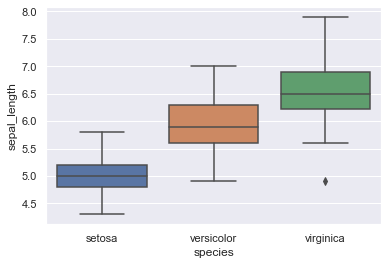

In [15]:
sns.boxplot(x="species", y="sepal_length", data=iris)

From this we can again tell that the virginica species has a longer sepal, combined with it having longer petals, it would be reasonable to predict that it is the largest species of iris.

We then look at the sepal width of the irises, to find the widest and narrowest sepals.

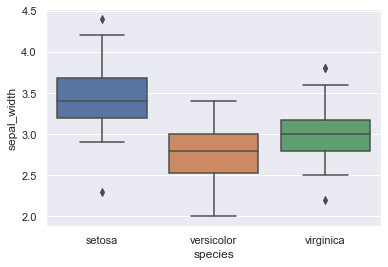

In [16]:
sns.boxplot(x="species", y="sepal_width", data=iris)

We find that the Setosa iris has the widest sepals, and the versicolor irises have the narrowest sepals.

## Conclusions

From the data we can conclude that the Virginica species of iris has both the longest petals and widest petals. The Virginica species additionall has the longest sepals, but it does not have the widest sepals. Sepals enclose the petals of an iris and are more leaf-like than petals. Sepals are also larger than petals with the mean length and width of observed sepals being 5.84 and 3.06 respectively. Comparatively, observed petals have a mean length and with of 3.756 and 1.199 respectively. 

Alternatively, Versicolor irises have the second longest petals and the second widest petals. Versicolor irises also have the second longest sepals, but the narrowest sepals. Given the trendline of the versicolor species, it is possible that with a petal width similar to that of the virginica iris, the versicolor species could have the longest petal. This can be easily seen in the figure below.

Setosa irises, however, have the shortest and narrowest petals. And while Setosa sepals are the shortest, they are surprisingly the widest. Ultimately this represents a difference between the species, because if all species of irises had similar growth relationships, the widest would have to additionally be the longest. 

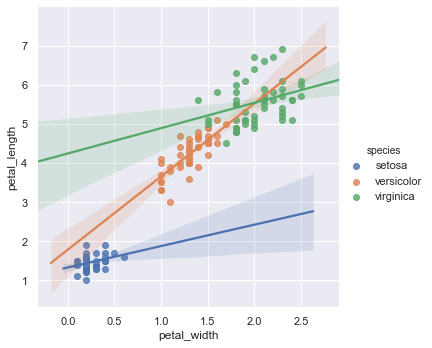

In [17]:
sns.lmplot(x="petal_width", y="petal_length", hue="species", data=iris);

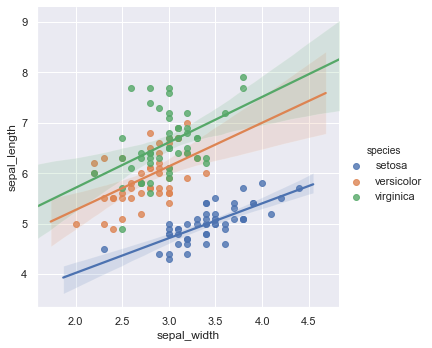

In [18]:
sns.lmplot(x="sepal_width", y="sepal_length", hue="species", data=iris);

What we have discovered here is that the different species' have a variety of different impacts on the aesthetics of the species, not just on the actual sizes of the irises but on the ratios of the sizes. This is best shown by the graphs above, while there is a fairly straight line between the data points in the petal dimensions, creating a plinear ratio. It is completely different for sepal length and width, where it seems to be almost random. Ultimately this leads to the species with the longest sepals to not have the widest sepals. 

Ultimately, there is a direct relationship between petal height and width, but there is not necessarily a direct relationship between sepal height and width.

In the future it would be interesting to look at additional iris species, or to compare irises to other species of flowers and see if this trend repeats itself. 

## Acknowledgements

Many thanks to Navya Mangipudi and Ms. Sconyers for their much appreciated help. Additional thanks to Merriam Webster for their definition of a sepal. Thanks to Seaborn Data libraries for their iris.csv file. Additional thanks to Ms. Sconyers for provision of helpful code. 